In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#Followed https://careerhigh.in/blog/23/

In [23]:
#Reading companies and rounds2 dataframe
train = pd.read_csv("./train.csv",encoding='latin')
test = pd.read_csv("./test.csv", encoding='latin')
combine = [train, test]

In [24]:
train.isnull().sum()
#train.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

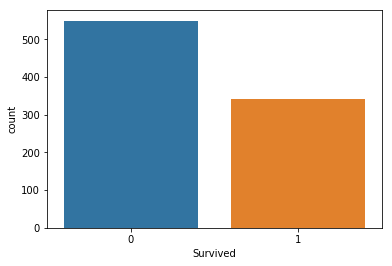

In [27]:
#Checking the Survival
#plt.figure(figsize=(10, 8))
sns.countplot(x="Survived", data=train)
plt.show()

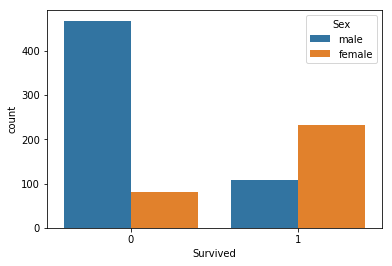

In [28]:
#Checking the distribution with Sex and Survival
#Feamles survived more
sns.countplot(x="Survived", hue= 'Sex', data=train)

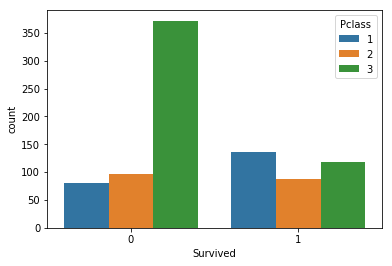

In [29]:
#Checking now with PClass
sns.countplot(x="Survived", hue= 'Pclass', data=train)
#More class-1 survivors survived, most Class-3 lost lives

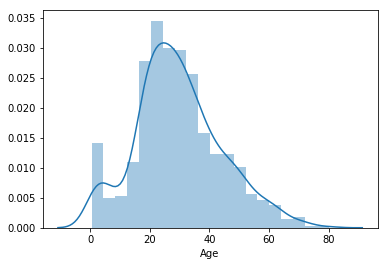

In [30]:
#Let's plot Age distribution
sns.distplot(train['Age'].dropna(), bins=20)

(array([385., 177., 139.,  31.,  41.,  26.,  31.,   8.,  11.,   4.,   7.,
          9.,   2.,   0.,   0.,   0.,   4.,   5.,   0.,   2.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <a list of 40 Patch objects>)

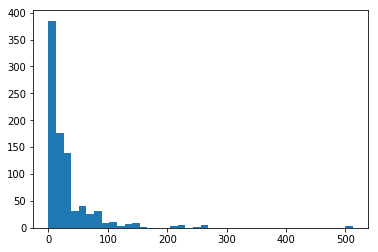

In [31]:
#Age Histogram
plt.hist(train['Fare'],bins=40)

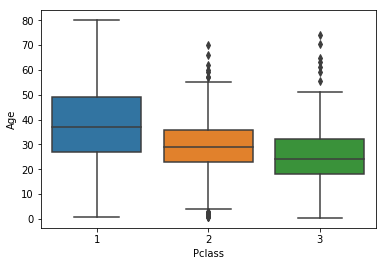

In [32]:
sns.boxplot(x='Pclass', y='Age', data=train)

plt.show()

In [33]:
#Imputing age
def imputeAge(cols):
    age = cols[0]
    pclass = cols[1]
    if(pd.isnull(age)):
        if (pclass == 1):
            return 39
        elif (pclass == 2):
            return 29
        else:
            return 24
    else:
        return age

train['Age'] = train[['Age', 'Pclass']].apply(imputeAge, axis=1)

In [34]:
train.head(50)
#Impute Cabin with 1/0

def imputeCabin(col):
    if pd.isnull(col[0]):
        return 0
    else:
        return 1

train['Cabin'] = train[['Cabin']].apply(imputeCabin, axis=1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [36]:
#Converting Categorical features to dummy variables
train_1 = train.copy()
#sex = pd.get_dummies(train_1['Sex'].drop_first=True)
sex = pd.get_dummies(train_1['Sex'],drop_first=True)
embark = pd.get_dummies(train_1['Embarked'],drop_first=True)
train_1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_1 = pd.concat([train_1,sex,embark],axis=1)

In [37]:
train_1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [38]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(train_1.drop('Survived',axis=1),train_1['Survived'], test_size=0.25,random_state=101)

In [39]:
#Logistics Regression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

#Let’s evaluate our results on the X_test part of the dataset.

print(accuracy_score(y_test, pred))

0.757847533632287


In [41]:
#AdaBoost
regressor4 = AdaBoostClassifier()
regressor4.fit(X_train, y_train)

pred4 = regressor4.predict(X_test)
print(accuracy_score(y_test, pred4))

0.7668161434977578
